In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'file:///C:\Users\puneet\Desktop\data%20analytics\aug_train.csv')

In [3]:
data.head(2)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0


In [4]:
data.shape

(19158, 14)

In [5]:
data.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [6]:
data.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                      int64
dtype: object

In [7]:
data.corr()

,enrollee_id,city_development_index,training_hours,target
enrollee_id,1.000000,-0.040455,0.000998,0.049475
city_development_index,-0.040455,1.000000,0.001920,-0.341665
training_hours,0.000998,0.001920,1.000000,-0.021577
target,0.049475,-0.341665,-0.021577,1.000000


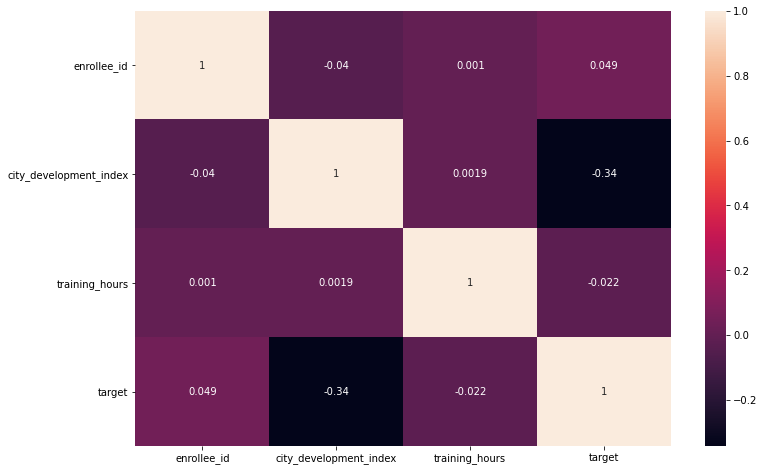

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot = True)
plt.show()

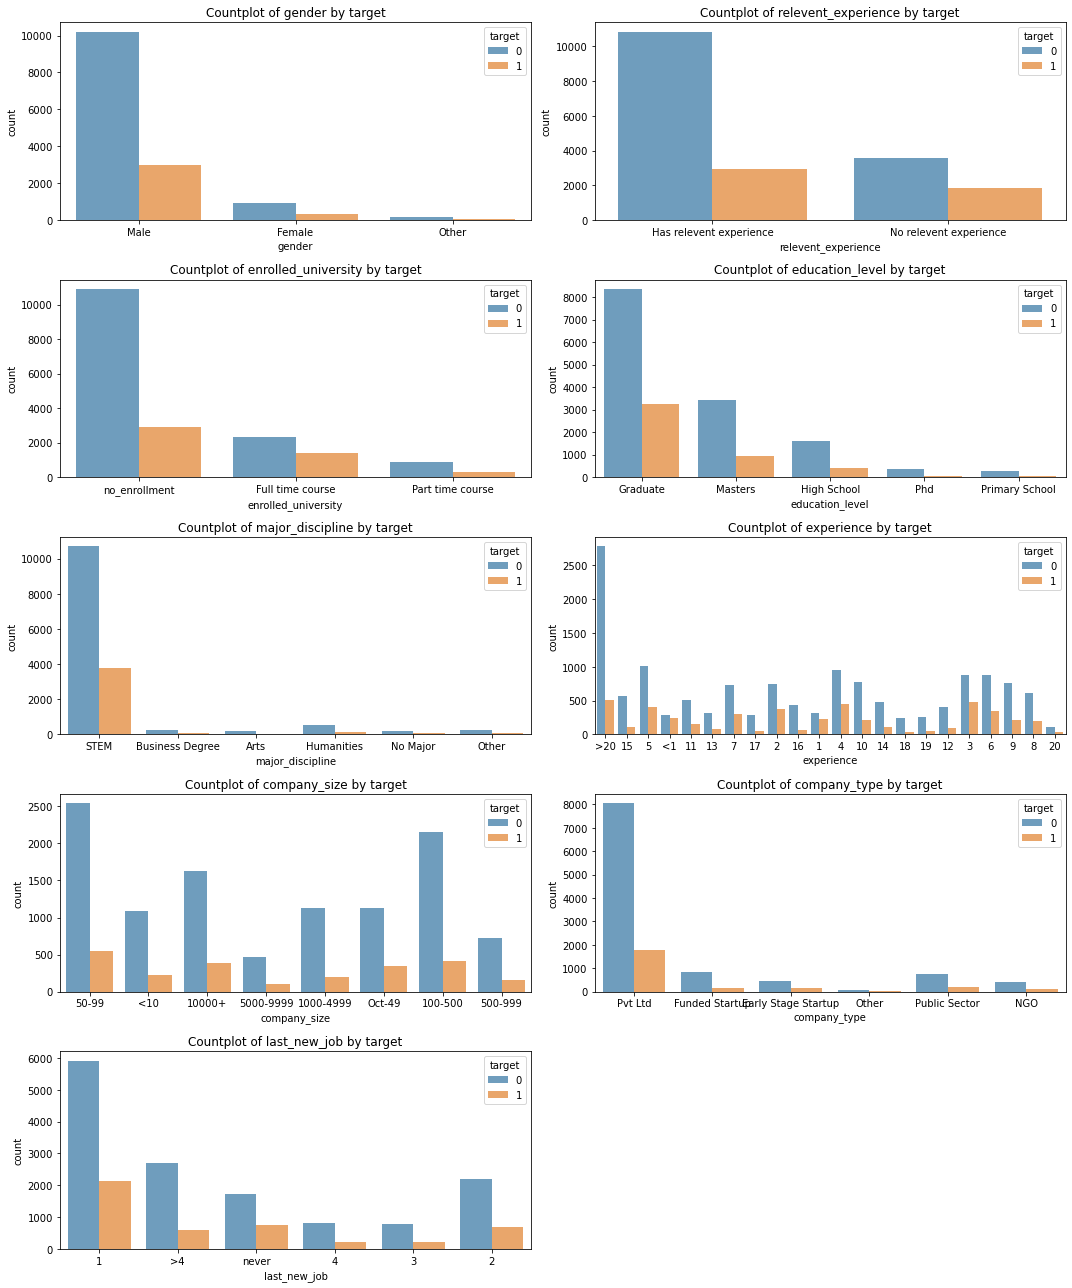

In [9]:
#count plot of all features w.r.t to TV

plt.figure(figsize=[15,18])
features = ['gender','relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job']
n=1
for f in features:
    plt.subplot(5,2,n)
    sns.countplot(x=f,hue = 'target', alpha = 0.7, data = data)
    plt.title('Countplot of {} by target'.format(f))
    n = n+1
plt.tight_layout()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'skew :1.8190947994281477')

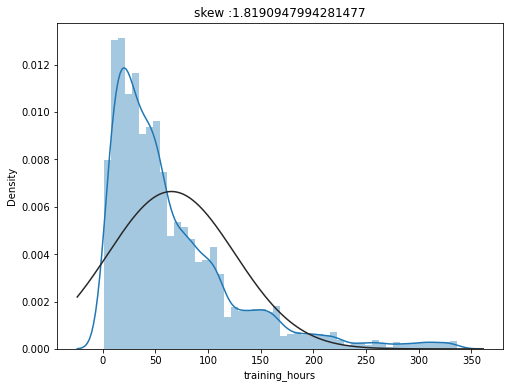

In [10]:
from scipy.stats import norm,skew
plt.figure(figsize=[8,6])
sns.distplot(data['training_hours'], fit=norm)
plt.title('skew :{}'.format(skew(data['training_hours'])))

<AxesSubplot:xlabel='target', ylabel='training_hours'>

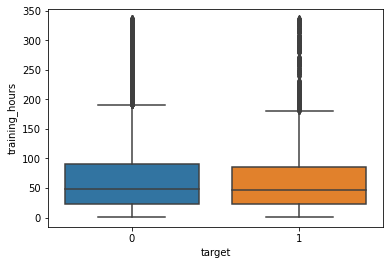

In [11]:
sns.boxplot(y='training_hours', x= 'target', data = data)

<AxesSubplot:xlabel='target', ylabel='city_development_index'>

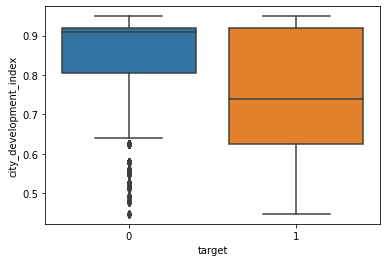

In [12]:
sns.boxplot(y='city_development_index', x= 'target', data = data)

<AxesSubplot:xlabel='major_discipline,education_level'>

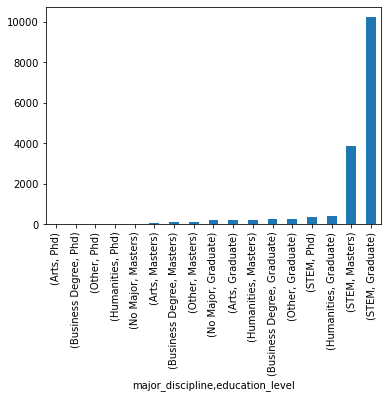

In [13]:
data[['major_discipline', 'education_level']].value_counts().sort_values().plot(kind = 'bar')

In [14]:
numeric_columns = list(data.select_dtypes(exclude=['object']).dtypes.index)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


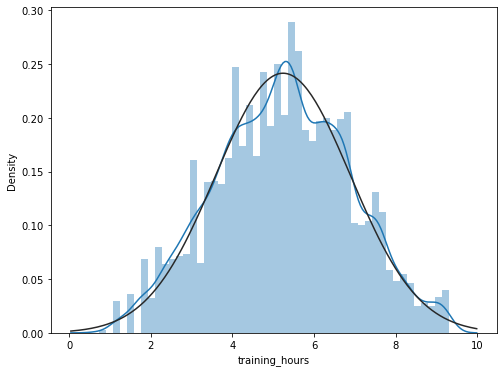

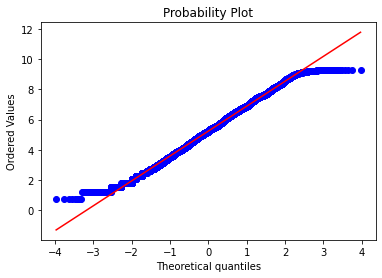

skew :-0.0006093163913336298


In [15]:
from scipy.special import boxcox1p
from scipy import stats
#boxcox transformation
data['training_hours'] = boxcox1p(data['training_hours'], 0.15)
plt.figure(figsize=(8,6))
sns.distplot(data['training_hours'],fit=norm)
plt.show()
stats.probplot(data['training_hours'],plot=plt)
plt.show()
print('skew :{}'.format(skew(data['training_hours'])))

In [16]:
data.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4498
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [17]:
data.gender.isna().sum()

4498

In [18]:
data.gender.value_counts()

Male      13216
Female     1253
Other       191
Name: gender, dtype: int64

In [19]:
data.major_discipline.value_counts()

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

In [20]:
data.gender = data.gender.fillna('Male')

In [21]:
data.major_discipline = data.major_discipline.fillna('STEM')

In [22]:
data.company_type.value_counts()

Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64

In [23]:
data.company_type = data.company_type.fillna('Pvt Ltd')

In [24]:
data.enrolled_university.value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

In [25]:
data.enrolled_university = data.enrolled_university.fillna('no_enrollment')

In [26]:
#forwardfill
#backwardfill
data.company_size = data.company_size.fillna(method = 'ffill')

In [27]:
data.experience  = data.experience.fillna(method = 'ffill')

In [28]:
data.last_new_job  = data.last_new_job.fillna(method = 'bfill')

In [29]:
data.education_level  = data.education_level.fillna(method = 'ffill')

In [30]:
data.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              1
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [31]:
data.dropna(inplace = True)

In [32]:
data.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data.gender = le.fit_transform(data['gender'])

In [34]:
data.relevent_experience = le.fit_transform(data['relevent_experience'])
data.enrolled_university = le.fit_transform(data['enrolled_university'])

In [35]:
data.education_level.value_counts()

Graduate          11889
Masters            4469
High School        2063
Phd                 420
Primary School      316
Name: education_level, dtype: int64

In [36]:
ordinal_education_level = {'Primary School' : 0, 'High School' :1, 'Graduate' :2, 'Masters' :3,
                           'Phd' :4,}
data.education_level = data.education_level.map(ordinal_education_level)

In [37]:
data.major_discipline = le.fit_transform(data['major_discipline'])

In [38]:
ordinal_experience = {'<1':0, '1':1, '2':2, '3':3, '4':4, '5':5, 
                      '6':6, '7':7, '8':8, '9':9, '10':10,
                      '11':11, '12':12, '13':13, '14':14, 
                      '15':15, '16':16, '17':17, '18':18, '19':19, '20':20, '>20':21}
data.experience = data.experience.map(ordinal_experience)

In [39]:
ordinal_company_size = {'<10':0, 'Oct-49':1, '50-99':2, '100-500':3, 
                        '500-999':4, '1000-4999':5, '5000-9999':6, '10000+':7}
data.company_size = data.company_size.map(ordinal_company_size)

In [40]:
data.company_type = le.fit_transform(data['company_type'])

In [41]:
ordinal_last_new_job = {'never':0, '1':1, '2':2, '3':3, 
                        '4':4, '>4':5}
data.last_new_job = data.last_new_job.map(ordinal_last_new_job)

In [42]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1,29725,city_40,0.776,1,1,2,2,5,15,2,5,5,5.248357,0
2,11561,city_21,0.624,0,1,0,2,5,5,2,5,0,6.291711,0
3,33241,city_115,0.789,0,1,2,2,1,0,2,5,0,5.426781,1
4,666,city_162,0.767,0,0,2,3,5,21,2,1,4,2.602594,0
5,21651,city_176,0.764,0,0,1,2,5,11,2,5,1,4.137711,1


In [43]:
data.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [44]:
data.city

1         city_40
2         city_21
3        city_115
4        city_162
5        city_176
           ...   
19153    city_173
19154    city_103
19155    city_103
19156     city_65
19157     city_67
Name: city, Length: 19157, dtype: object

In [45]:
data.city = data.city.apply(lambda x: int(x.split('_')[1]))
data.city

1         40
2         21
3        115
4        162
5        176
        ... 
19153    173
19154    103
19155    103
19156     65
19157     67
Name: city, Length: 19157, dtype: int64

In [46]:
data = data.drop('enrollee_id', axis = 1)

In [47]:
data.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1,40,0.776,1,1,2,2,5,15,2,5,5,5.248357,0
2,21,0.624,0,1,0,2,5,5,2,5,0,6.291711,0
3,115,0.789,0,1,2,2,1,0,2,5,0,5.426781,1
4,162,0.767,0,0,2,3,5,21,2,1,4,2.602594,0
5,176,0.764,0,0,1,2,5,11,2,5,1,4.137711,1


# Removing outliers

In [48]:
z = np.abs(stats.zscore(data[['city_development_index', 'training_hours']]))
print(z)

[[0.42836611 0.00556094]
 [1.66053214 0.63720926]
 [0.32298349 0.11357876]
 ...
 [0.73894908 0.06393326]
 [0.21760087 0.82072016]
 [0.21203597 1.14886756]]


In [49]:
threshold = 3
print(np.where(z>3))

(array([ 1522,  4743,  5009,  5264,  5566,  6126,  7723,  7863,  9133,
       10400, 13548, 14912, 15113, 16554, 16783, 17700, 18064],
      dtype=int64), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))


In [50]:
data1 = data[(z<3).all(axis = 1)]

In [51]:
data1.shape

(19140, 13)

0    14375
1     4765
Name: target, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

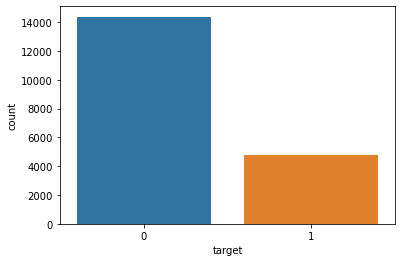

In [52]:
print(data1['target'].value_counts())
sns.countplot(data1['target'])

# Data balancing

In [53]:
y = data1.target
x = data1.drop('target', axis = 1)

In [54]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from collections import Counter

In [55]:
num_before = dict(Counter(y))
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x,y)

num_after = dict(Counter(y_smote))

In [56]:
print(num_before, num_after)

{0: 14375, 1: 4765} {0: 14375, 1: 14375}


In [57]:
after_smote= list(num_after.values())
after_smote.reverse()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


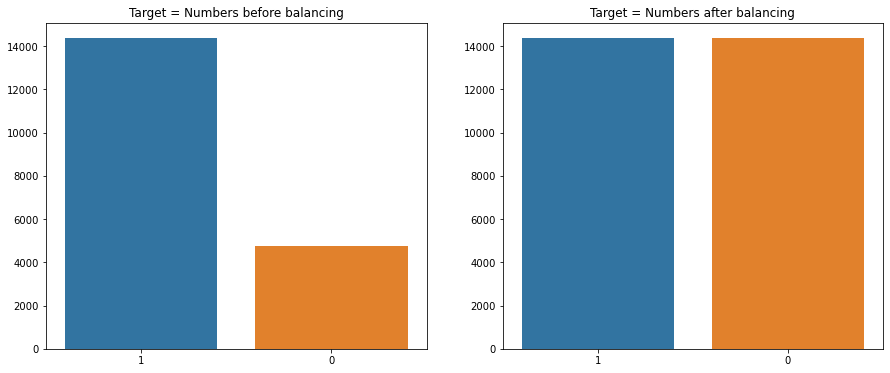

In [58]:
labels = ["1", "0"]
label1 = ["1", "0"]

plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sns.barplot(labels, list(num_before.values()))
plt.title("Target = Numbers before balancing")

plt.subplot(1,2,2)
sns.barplot(labels, after_smote)
plt.title("Target = Numbers after balancing")

plt.show()

# train test split

In [63]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.25, random_state= 91)

In [68]:
from sklearn.preprocessing import MinMaxScaler
scaler  = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Building all classifiers model

In [69]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [73]:
models = []
models.append(('Logistic Regression', LogisticRegression(random_state = 42) ))
models.append(('Naive Bayes', GaussianNB() ))
models.append(('KNN', KNeighborsClassifier() ))
models.append(('CART', DecisionTreeClassifier(random_state = 42) ))
models.append(('Random Forest', RandomForestClassifier(random_state = 42) ))
models.append(('SVM', SVC(random_state = 42) ))
models.append(('XGBoost', XGBClassifier(random_state = 42) ))
models.append(('GradientBoosting', GradientBoostingClassifier(random_state = 42) ))
results = []
names  = []

In [74]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

In [75]:
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print('{}:{}'.format(name,accuracy))

Logistic Regression:0.6850306065664997
Naive Bayes:0.6889259877573733
KNN:0.738174735670562
CART:0.7309404563160824
Random Forest:0.812047857540345
SVM:0.7113244296048971


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:25:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost:0.8142737896494157
GradientBoosting:0.7341402337228714


In [76]:
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    precision = precision_score(y_test,y_pred)
    print('{}:{}'.format(name,precision))

Logistic Regression:0.7170388498011624
Naive Bayes:0.701813110181311
KNN:0.7216342603987201
CART:0.7342619876774712
Random Forest:0.8142857142857143
SVM:0.7373081463990555
[11:28:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBoost:0.8325779036827196
GradientBoosting:0.7676737160120846


In [77]:
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    recall = recall_score(y_test,y_pred)
    print('{}:{}'.format(name,recall))

Logistic Regression:0.6364376866684768
Naive Bayes:0.683138745587836
KNN:0.7960901439044258
CART:0.7442302470811838
Random Forest:0.82025522671735
SVM:0.6782514254683681
[11:30:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBoost:0.7979907683953299
GradientBoosting:0.689926690198208


In [78]:
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    f1 = f1_score(y_test,y_pred)
    print('{}:{}'.format(name,f1))

Logistic Regression:0.6743383199079401
Naive Bayes:0.6923500275178865
KNN:0.7570358894913504
CART:0.7392125134843582
Random Forest:0.8172595698633843
SVM:0.7065478715881771
[11:32:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBoost:0.8149175100512962
GradientBoosting:0.7267267267267267


In [79]:
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    conf = confusion_matrix(y_test,y_pred)
    print('{}:{}'.format(name,conf))

Logistic Regression:[[2580  925]
 [1339 2344]]
Naive Bayes:[[2436 1069]
 [1167 2516]]
KNN:[[2374 1131]
 [ 751 2932]]
CART:[[2513  992]
 [ 942 2741]]
Random Forest:[[2816  689]
 [ 662 3021]]
SVM:[[2615  890]
 [1185 2498]]
[11:33:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBoost:[[2914  591]
 [ 744 2939]]
GradientBoosting:[[2736  769]
 [1142 2541]]


In [85]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rfpred = rf.predict(x_test)

In [86]:
rfpred = rf.score(x_test, y_test)
rfpred

0.8112131329994435

In [87]:
rfpred = rf.score(x_train, y_train)
rfpred

0.9993043316946479

In [88]:
rf = RandomForestClassifier(n_estimators = 500)
rf.fit(x_train, y_train)
rfpred = rf.predict(x_test)

In [82]:
from sklearn.model_selection import cross_val_score
rfc_val = cross_val_score(estimator = rf , X = x_test, y= y_test, cv = 10)
rfc_val.mean()

0.7563944816578271

In [89]:
from sklearn.model_selection import cross_val_score
rfc_val = cross_val_score(estimator = rf , X = x_train, y= y_train, cv = 10)
rfc_val.mean()

0.80382150963812

In [90]:
y_pred = rf.predict_proba(x_test)
print(y_pred)

[[0.986 0.014]
 [0.778 0.222]
 [0.794 0.206]
 ...
 [0.388 0.612]
 [0.874 0.126]
 [0.918 0.082]]


In [91]:
print(rf.feature_importances_)

[0.11561055 0.17841451 0.01731467 0.01998543 0.04046451 0.04394046
 0.02435943 0.13377986 0.08868132 0.03561753 0.06366477 0.23816696]


# Feature importance

In [92]:
importances = rf.feature_importances_
features = data.columns[:12]
imp = pd.DataFrame({'Features' :features,'Importance' :importances })
imp['sum importance'] = imp['Importance'].cumsum()
imp = imp.sort_values(by = 'Importance')
imp

,Features,Importance,sum importance
2,gender,0.017315,0.311340
3,relevent_experience,0.019985,0.331325
6,major_discipline,0.024359,0.440090
9,company_type,0.035618,0.698168
4,enrolled_university,0.040465,0.371790
5,education_level,0.043940,0.415730
10,last_new_job,0.063665,0.761833
8,company_size,0.088681,0.662551
0,city,0.115611,0.115611
7,experience,0.133780,0.573869


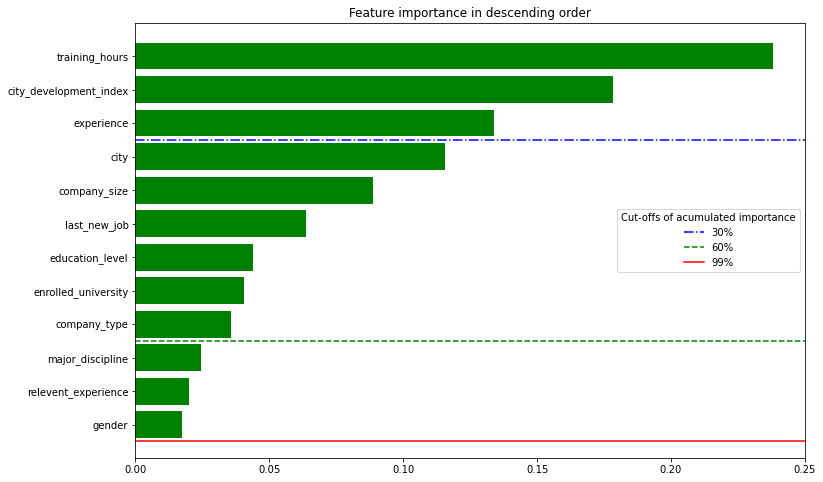

In [100]:
plt.figure(figsize=(12,8))
plt.barh(imp['Features'], imp['Importance'], color = 'g')
l1 = plt.axhline(len(imp) - (len(imp['Features'][imp['sum importance'] < 0.30]) + 1.5), linestyle='-.', color = 'b')
l2 = plt.axhline(len(imp) - (len(imp['Features'][imp['sum importance'] < 0.60]) + 1.5), linestyle='--', color = 'g')
l3 = plt.axhline(len(imp) - (len(imp['Features'][imp['sum importance'] < 0.99]) + 1.5), linestyle='-', color = 'r')
plt.legend(title = 'Cut-offs of acumulated importance', handles=(l1, l2, l3), labels = ('30%', '60%', '99%'))
plt.title('Feature importance in descending order')
plt.show()